In [137]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Notebook description/goals

Compare output of Debby's CO2sys code with all 8 options for constants for Borate, K1K2, and Kf (2^3)

    Summary:
    -I think we should use Lee 2010, Millero 2010, and Dickson/Goyet 1979 for the 3 constants respectively. (Best practices discussed in Orr et al 2014)

    -My option 4 (Uppstrom, Millero, Dickson/Goyet) agrees best with Debby's original calculation
    -My option 0 (Lee, Millero, Dickson/Goyet) agrees best with Debby's updated (with Lee) calculation, as expected



In [138]:
%reset 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [139]:
import sys
#sys.path.append('/data/tjarniko/MEOPAR/mocsy')
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
import mocsy
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
import seawater as sw

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn-bright')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## load dataset

In [140]:
print(mocsy)

<module 'mocsy' from '/data/tjarniko/mocsy/mocsy.cpython-36m-x86_64-linux-gnu.so'>


In [141]:
infil = loadtxt('../MODEL_EVAL/tereza.txt')

In [142]:

crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
mon = infil[:,4]
day = infil[:,5]
lat_or = infil[:,6]
lon_or = infil[:,7]
# lat = infil_cor[:,6]
# lon = infil_cor[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]



## convert dic from umol/kg > mol/kg, convert si, po4 from umol/L > mol/kg

In [143]:
dens = sw.dens(S,T,P)
dic_conv=dic *1e-6
alk_conv=alk *1e-6
si_conv = si*dens/1000*1e-6
po4_conv = po4*dens/1000*1e-6

In [144]:
print(dens)
print(dic)
print(dic_conv)

print("[1995.42 2162.43 2234.39]")

[ 1024.10773013  1025.76483947  1026.86751858]
[ 1995.42  2162.43  2234.39]
[ 0.00199542  0.00216243  0.00223439]
[1995.42 2162.43 2234.39]


## assign pressure in atmospheres > 1 atm

In [145]:
PATM = np.zeros_like(dic)
PATM[:] = 1.0
print(PATM)

[ 1.  1.  1.]


## assign tags (0-7) to combinations of constants

    [in]	optb	for total boron, choose either 'u74' (Uppstrom, 1974) or 'l10' (Lee et al., 2010). The 'l10' formulation is based on 139 measurements (instead of 20), uses a more accurate method, and generally increases total boron in seawater by 4%
    [in]	optkf	for Kf, choose either 'pf' (Perez & Fraga, 1987) or 'dg' (Dickson & Riley, 1979)
    [in]	optk1k2	for K1,K2 choose either 'l' (Lueker et al., 2000) or 'm10' (Millero, 2010)


In [146]:
import pandas as pd
data = [['Lee', 'Millero','DG'], ['Lee', 'Millero','PF'],\
       ['Lee', 'Luecker','DG'],['Lee', 'Luecker','PF'],\
       ['Uppstrom', 'Millero','DG'], ['Uppstrom', 'Millero','PF'],\
       ['Uppstrom', 'Luecker','DG'],['Uppstrom', 'Luecker','PF'],]
pd.DataFrame(data, columns=["Borate","K1K2","KF"])

,Borate,K1K2,KF
0,Lee,Millero,DG
1,Lee,Millero,PF
2,Lee,Luecker,DG
3,Lee,Luecker,PF
4,Uppstrom,Millero,DG
5,Uppstrom,Millero,PF
6,Uppstrom,Luecker,DG
7,Uppstrom,Luecker,PF


In [147]:
#0
pH_0,pco2_0,fco2_0,co2_0,hco3_0,co3_0,OmegaA_0,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Ppot' )
#1
pH_1,pco2_1,fco2_1,co2_1,hco3_1,co3_1,OmegaA_1,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'pf', optgas = 'Ppot' )  
#2
pH_2,pco2_2,fco2_2,co2_2,hco3_2,co3_2,OmegaA_2,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='l', optkf = 'dg', optgas = 'Ppot' )
#3
pH_3,pco2_3,fco2_3,co2_3,hco3_3,co3_3,OmegaA_3,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='l', optkf = 'pf', optgas = 'Ppot' )
#0
pH_4,pco2_4,fco2_4,co2_4,hco3_4,co3_4,OmegaA_4,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'u74', optk1k2='m10', optkf = 'dg', optgas = 'Ppot' )
#1
pH_5,pco2_5,fco2_5,co2_5,hco3_5,co3_5,OmegaA_5,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'u74', optk1k2='m10', optkf = 'pf', optgas = 'Ppot' )  
#2
pH_6,pco2_6,fco2_6,co2_6,hco3_6,co3_6,OmegaA_6,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'u74', optk1k2='l', optkf = 'dg', optgas = 'Ppot' )
#3
pH_7,pco2_7,fco2_7,co2_7,hco3_7,co3_7,OmegaA_7,OmegaC,BetaD,DENis,p,Tis \
    = mocsy.mvars(temp=T , sal=S , alk=alk_conv, dic=dic_conv, sil=si_conv, phos=po4_conv, 
                            patm=PATM, depth=P, lat=lat_or, optcon='mol/kg', optt='Tinsitu', optp='m',
                            optb = 'u74', optk1k2='l', optkf = 'pf', optgas = 'Ppot' )

In [148]:
pH_deb= [8.09712784, 7.76907771, 7.63518989]
pco2_deb =[ 346.43071199, 795.59072662, 1096.50343874]
OmegaA_deb=[2.3880103, 1.03658638, 0.74203948]

pH_deb2 = [8.09143146, 7.76477696, 7.63176642]
pco2_deb2 = [ 351.32793762,  803.62406547, 1105.16732885]
OmegaA_deb2= [2.35906408, 1.02651953, 0.73620388]
# the next set of results is identical (Millero et al. 2010 C constants) EXCEPT 
# using Lee et al. 2010 Borate constants rather than Upstrom 
# - 'choice 3 rather than '1', final entry calling CO2SYS
#z [  4.9  29.3 102.8]
#dic [1995.42 2162.43 2234.39]
#pco2 [ 351.32793762  803.62406547 1105.16732885]
#pH [8.09143146 7.76477696 7.63176642]
#omega_arag [2.35906408 1.02651953 0.73620388]
#co3 [152.70187775  67.68747421  49.42965052]
#T [14.195  8.94   7.258]
#borate alk [73.15041384 34.42193765 25.63134634]
#OH- (oh) [2.58948167 0.7311708  0.45952616]

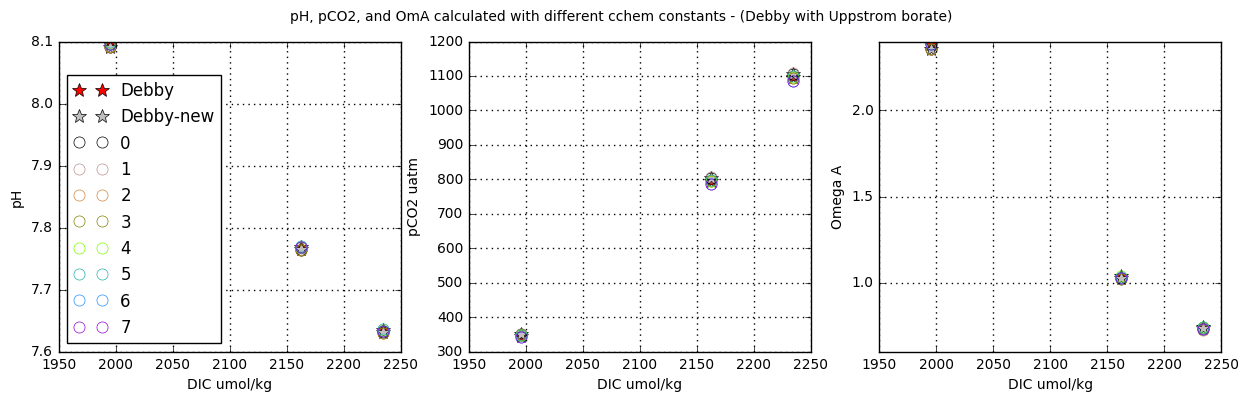

In [149]:
fig = plt.figure(figsize=(15,4))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,pH_deb,c='red',marker='*',linestyle='None',markersize=10)
        ax.plot(dic,pH_deb2,c='silver',marker='*',linestyle='None',markersize=10)
        ax.plot(dic,pH_0,c='black',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pH_1,c='rosybrown',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pH_2,c='peru',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pH_3,c='olive',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pH_4,c='lawngreen',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pH_5,c='lightseagreen',marker='o',fillstyle='none',linestyle='None',markersize=8)        
        ax.plot(dic,pH_6,c='dodgerblue',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pH_7,c='darkviolet',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('pH')
        ax.legend(['Debby','Debby-new','0','1','2','3','4','5','6','7'],loc='lower left')

    if i == 2:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,pco2_deb,c='red',marker='*',linestyle='None',markersize=10)
        ax.plot(dic,pco2_deb2,c='silver',marker='*',linestyle='None',markersize=10)
        ax.plot(dic,pco2_0,c='black',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pco2_1,c='rosybrown',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pco2_2,c='peru',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pco2_3,c='olive',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pco2_4,c='lawngreen',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pco2_5,c='lightseagreen',marker='o',fillstyle='none',linestyle='None',markersize=8)        
        ax.plot(dic,pco2_6,c='dodgerblue',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,pco2_7,c='darkviolet',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('pCO2 uatm')        
        

    if i == 3:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,OmegaA_deb,c='red',marker='*',linestyle='None',markersize=10)
        ax.plot(dic,OmegaA_deb2,c='silver',marker='*',linestyle='None',markersize=10)
        ax.plot(dic,OmegaA_0,c='black',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,OmegaA_1,c='rosybrown',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,OmegaA_2,c='peru',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,OmegaA_3,c='olive',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,OmegaA_4,c='lawngreen',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,OmegaA_5,c='lightseagreen',marker='o',fillstyle='none',linestyle='None',markersize=8)        
        ax.plot(dic,OmegaA_6,c='dodgerblue',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.plot(dic,OmegaA_7,c='darkviolet',marker='o',fillstyle='none',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('Omega A')
plt.suptitle('pH, pCO2, and OmA calculated with different cchem constants - (Debby with Uppstrom borate)')


In [150]:
phd = np.asarray(pH_deb)
pco2d = np.asarray(pco2_deb)
OmAd = np.asarray(OmegaA_deb)

phd2 = np.asarray(pH_deb2)
pco2d2 = np.asarray(pco2_deb2)
OmAd2 = np.asarray(OmegaA_deb2)


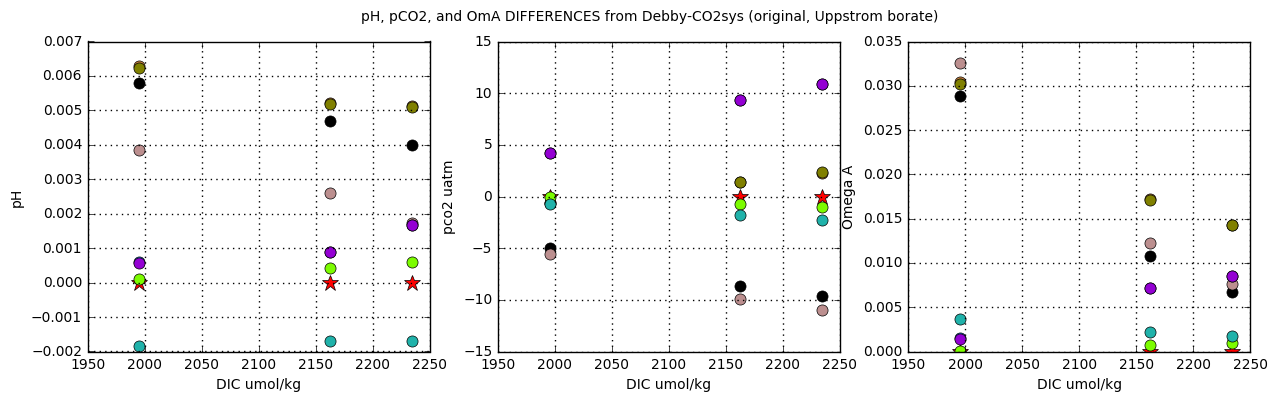

In [151]:
fig = plt.figure(figsize=(15,4))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,phd-phd,c='red',marker='*',linestyle='None',markersize=12)
        ax.plot(dic,phd-pH_0,c='black',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd-pH_1,c='rosybrown',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd-pH_2,c='peru',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd-pH_3,c='olive',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd-pH_4,c='lawngreen',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd-pH_5,c='lightseagreen',marker='o',fillstyle='full',linestyle='None',markersize=8)        
        ax.plot(dic,phd-pH_6,c='dodgerblue',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd-pH_7,c='darkviolet',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('pH')        
        

    if i == 2:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,pco2d-pco2d,c='red',marker='*',linestyle='None',markersize=12)
        ax.plot(dic,pco2d-pco2_0,c='black',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d-pco2_1,c='rosybrown',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d-pco2_2,c='peru',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d-pco2_3,c='olive',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d-pco2_4,c='lawngreen',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d-pco2_5,c='lightseagreen',marker='o',fillstyle='full',linestyle='None',markersize=8)        
        ax.plot(dic,pco2d-pco2_6,c='dodgerblue',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d-pco2_7,c='darkviolet',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('pco2 uatm')    
        

    if i == 3:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,OmAd-OmAd,c='red',marker='*',linestyle='None',markersize=12)
        ax.plot(dic,OmAd-OmegaA_0,c='black',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd-OmegaA_1,c='rosybrown',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd-OmegaA_2,c='peru',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd-OmegaA_3,c='olive',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd-OmegaA_4,c='lawngreen',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd-OmegaA_5,c='lightseagreen',marker='o',fillstyle='full',linestyle='None',markersize=8)        
        ax.plot(dic,OmAd-OmegaA_6,c='dodgerblue',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd-OmegaA_7,c='darkviolet',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('Omega A')
plt.suptitle('pH, pCO2, and OmA DIFFERENCES from Debby-CO2sys (original, Uppstrom borate)')



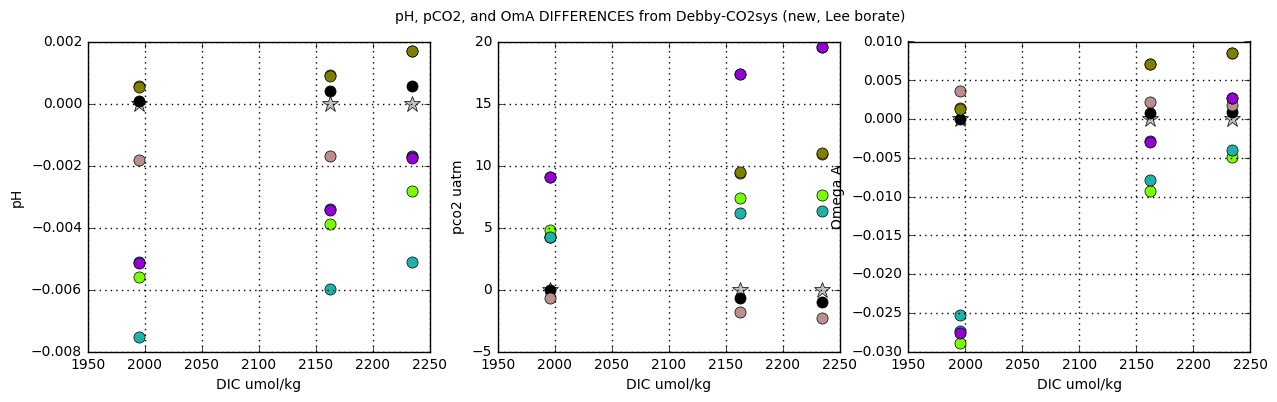

In [152]:
fig = plt.figure(figsize=(15,4))

for i in range(1,4):
    if i == 1:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,phd2-phd2,c='silver',marker='*',linestyle='None',markersize=12)
        ax.plot(dic,phd2-pH_0,c='black',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd2-pH_1,c='rosybrown',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd2-pH_2,c='peru',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd2-pH_3,c='olive',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd2-pH_4,c='lawngreen',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd2-pH_5,c='lightseagreen',marker='o',fillstyle='full',linestyle='None',markersize=8)        
        ax.plot(dic,phd2-pH_6,c='dodgerblue',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,phd2-pH_7,c='darkviolet',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('pH')        
        

    if i == 2:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,pco2d2-pco2d2,c='silver',marker='*',linestyle='None',markersize=12)
        ax.plot(dic,pco2d2-pco2_0,c='black',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d2-pco2_1,c='rosybrown',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d2-pco2_2,c='peru',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d2-pco2_3,c='olive',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d2-pco2_4,c='lawngreen',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d2-pco2_5,c='lightseagreen',marker='o',fillstyle='full',linestyle='None',markersize=8)        
        ax.plot(dic,pco2d2-pco2_6,c='dodgerblue',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,pco2d2-pco2_7,c='darkviolet',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('pco2 uatm')    
        

    if i == 3:
        ax = fig.add_subplot(1,3,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(dic,OmAd2-OmAd2,c='silver',marker='*',linestyle='None',markersize=12)
        ax.plot(dic,OmAd2-OmegaA_0,c='black',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd2-OmegaA_1,c='rosybrown',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd2-OmegaA_2,c='peru',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd2-OmegaA_3,c='olive',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd2-OmegaA_4,c='lawngreen',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd2-OmegaA_5,c='lightseagreen',marker='o',fillstyle='full',linestyle='None',markersize=8)        
        ax.plot(dic,OmAd2-OmegaA_6,c='dodgerblue',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.plot(dic,OmAd2-OmegaA_7,c='darkviolet',marker='o',fillstyle='full',linestyle='None',markersize=8)
        ax.set_xlabel('DIC umol/kg')
        ax.set_ylabel('Omega A')
plt.suptitle('pH, pCO2, and OmA DIFFERENCES from Debby-CO2sys (new, Lee borate)')

